온라인 강의에서의 feature는 지역이었는데

과제에서는 food를 feature로해서 PCA 하는것을 시켰다. 




In [6]:
import scipy.io
import IPython.display as ipd
import librosa as rs
import numpy as np
import matplotlib.pyplot as plt

In [46]:
x,sr = rs.load("tt.wav",sr=16000)

len_x = 20

x = x[sr*1:sr*(1+len_x)]

print(x.shape)



(217722,)


In [47]:
ipd.Audio(x,rate = 16000)

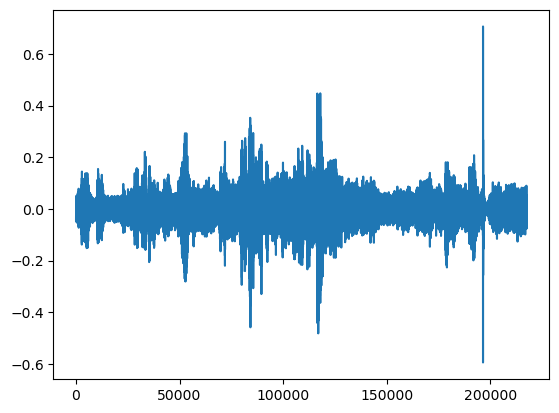

In [48]:
plt.figure()
plt.plot(x)

In [78]:
sz_seg = 1024
n_seg = x.shape[0]//sz_seg

x2 = np.reshape(x[:n_seg*sz_seg],(n_seg,sz_seg))
print(x2.shape)

(212, 1024)


(212,)
U : (212, 212),  S : (212,), Vt : (1024, 1024)
(212,)


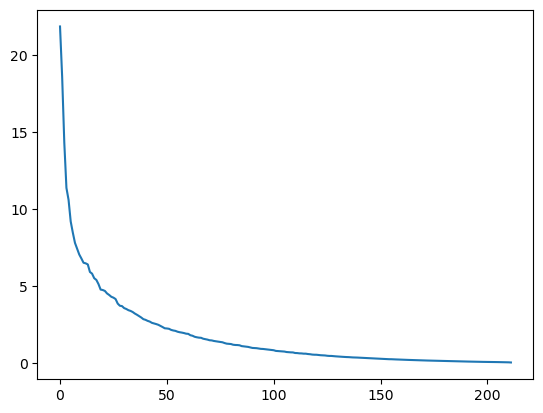

In [79]:


m,n = x2.shape # m x n matrix
# normalization
mean_x = x2.mean(axis=1)
print(mean_x.shape)

[U,S,Vt] = np.linalg.svd(x2,full_matrices=True, compute_uv=True,hermitian=False)
print("U : {},  S : {}, Vt : {}".format(U.shape,S.shape,Vt.shape))

# Hadamard product
Var= S*S
print(Var.shape)

plt.figure()
plt.plot(Var)

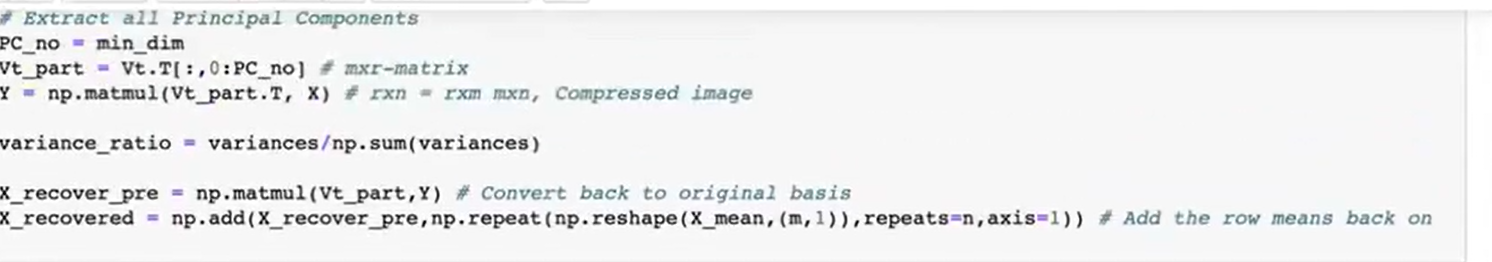

In [81]:
PC_no = 100



Vt_part = Vt.T[:,0:PC_no]

print("Vt' : {} | x2 : {}".format(Vt_part.shape,x2.shape))

Y = np.matmul(Vt_part.T, x2.T) # r x n
print(Y.shape)
ratio = m/(2*PC_no+1)

# recover

rec_1 = np.matmul(Vt_part,Y)
# to original shape
recovered = np.add(rec_1,np.repeat(np.reshape(mean_x,(m,1)),repeats=n,axis=1))

Vt' : (1024, 100) | x2 : (212, 1024)
(100, 212)


ValueError: operands could not be broadcast together with shapes (1024,212) (212,1024) 